# Ford GoBike System Data Exploration
## by Martin Tschendel

## Preliminary Wrangling

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
#load in the datasets 
data_1801 = pd.read_csv('data/201801-fordgobike-tripdata.csv')
data_1802 = pd.read_csv('data/201802-fordgobike-tripdata.csv')
data_1803 = pd.read_csv('data/201803-fordgobike-tripdata.csv')
data_1804 = pd.read_csv('data/201804-fordgobike-tripdata.csv')
data_1805 = pd.read_csv('data/201805-fordgobike-tripdata.csv')
data_1806 = pd.read_csv('data/201806-fordgobike-tripdata.csv')
data_1807 = pd.read_csv('data/201807-fordgobike-tripdata.csv')
data_1808 = pd.read_csv('data/201808-fordgobike-tripdata.csv')
data_1809 = pd.read_csv('data/201809-fordgobike-tripdata.csv')
data_1810 = pd.read_csv('data/201810-fordgobike-tripdata.csv')
data_1811 = pd.read_csv('data/201811-fordgobike-tripdata.csv')
data_1812 = pd.read_csv('data/201812-fordgobike-tripdata.csv')

In [3]:
data_1801.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null object
end_time                   94802 non-null object
start_station_id           94802 non-null int64
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null int64
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null int64
user_type                  94802 non-null object
member_birth_year          86963 non-null float64
member_gender              87001 non-null object
bike_share_for_all_trip    94802 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 11.6+ MB


In [4]:
data_1803.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111382 entries, 0 to 111381
Data columns (total 16 columns):
duration_sec               111382 non-null int64
start_time                 111382 non-null object
end_time                   111382 non-null object
start_station_id           111382 non-null int64
start_station_name         111382 non-null object
start_station_latitude     111382 non-null float64
start_station_longitude    111382 non-null float64
end_station_id             111382 non-null int64
end_station_name           111382 non-null object
end_station_latitude       111382 non-null float64
end_station_longitude      111382 non-null float64
bike_id                    111382 non-null int64
user_type                  111382 non-null object
member_birth_year          102347 non-null float64
member_gender              102385 non-null object
bike_share_for_all_trip    111382 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 13.6+ MB


In [5]:
data_1811.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134135 entries, 0 to 134134
Data columns (total 16 columns):
duration_sec               134135 non-null int64
start_time                 134135 non-null object
end_time                   134135 non-null object
start_station_id           133651 non-null float64
start_station_name         133651 non-null object
start_station_latitude     134135 non-null float64
start_station_longitude    134135 non-null float64
end_station_id             133651 non-null float64
end_station_name           133651 non-null object
end_station_latitude       134135 non-null float64
end_station_longitude      134135 non-null float64
bike_id                    134135 non-null int64
user_type                  134135 non-null object
member_birth_year          129037 non-null float64
member_gender              129037 non-null object
bike_share_for_all_trip    134135 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 16.4+ MB


In [6]:
#join dataframes along rows
df_18 = pd.concat([data_1801, data_1802, data_1803, data_1804,
                  data_1805, data_1806, data_1807, data_1808,
                  data_1809, data_1810, data_1811, data_1812,], sort=True)

In [7]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(7)
memory usage: 241.7+ MB


### Data quality issues
* data type of column 'timestamp' is object and not datetime
* datatype of user_type and member_gender is object and not category
* datatype of start_station_id and end_station_id  is float and not category

In [8]:
# Change datetype of columns start_time and end_time to datetime
df_18.start_time = pd.to_datetime(df_18.start_time)

In [9]:
df_18.end_time = pd.to_datetime(df_18.end_time)

In [10]:
# Change data type from object to category
df_18.user_type = df_18.user_type.astype('category')
df_18.member_gender = df_18.member_gender.astype('category')

In [11]:
# Convert the start_station_id and end_station_id column's data type from a float to a 
# string using astype, remove the '.0' using string slicing, and convert datatype from a string to a ctegory 
df_18.start_station_id = df_18.start_station_id.astype(str).str[:-2]
df_18.start_station_id = df_18.start_station_id.astype('category')
df_18.end_station_id = df_18.end_station_id.astype(str).str[:-2]
df_18.end_station_id = df_18.end_station_id.astype('category')

In [12]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             category
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           category
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
dtypes: category(4), datetime64[ns](2), float64(5), int64(2), object(3)
memory usage: 195.5+ MB


In [13]:
df_18.describe()

,bike_id,duration_sec,end_station_latitude,end_station_longitude,member_birth_year,start_station_latitude,start_station_longitude
count,1.863721e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06,1.863721e+06,1.863721e+06
mean,2.296851e+03,8.573026e+02,3.776690e+01,-1.223487e+02,1.983088e+03,3.776678e+01,-1.223492e+02
std,1.287733e+03,2.370379e+03,1.056483e-01,1.650597e-01,1.044289e+01,1.057689e-01,1.654634e-01
min,1.100000e+01,6.100000e+01,3.726331e+01,-1.224737e+02,1.881000e+03,3.726331e+01,-1.224737e+02
25%,1.225000e+03,3.500000e+02,3.777106e+01,-1.224094e+02,1.978000e+03,3.777106e+01,-1.224114e+02
50%,2.338000e+03,5.560000e+02,3.778127e+01,-1.223971e+02,1.985000e+03,3.778107e+01,-1.223974e+02
75%,3.333000e+03,8.720000e+02,3.779728e+01,-1.222894e+02,1.991000e+03,3.779625e+01,-1.222865e+02
max,6.234000e+03,8.636600e+04,4.551000e+01,-7.357000e+01,2.000000e+03,4.551000e+01,-7.357000e+01


In [14]:
df_18.head()

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,2765,No,75284,285,37.783521,-122.431158,Webster St at O'Farrell St,2018-02-01 19:47:19.824,1986.0,Male,120,37.761420,-122.426435,Mission Dolores Park,2018-01-31 22:52:35.239,Subscriber
1,2815,No,85422,15,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-01 15:57:17.310,NaN,NaN,15,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-01-31 16:13:34.351,Customer
2,3039,No,71576,296,37.325998,-121.877120,5th St at Virginia St,2018-02-01 10:16:52.116,1996.0,Male,304,37.348759,-121.894798,Jackson St at 5th St,2018-01-31 14:23:55.889,Customer
3,321,No,61076,47,37.780955,-122.399749,4th St at Harrison St,2018-02-01 07:51:20.500,NaN,NaN,75,37.773793,-122.421239,Market St at Franklin St,2018-01-31 14:53:23.562,Customer
4,617,No,39966,19,37.788975,-122.403452,Post St at Kearny St,2018-02-01 06:58:31.053,1991.0,Male,74,37.776435,-122.426244,Laguna St at Hayes St,2018-01-31 19:52:24.667,Subscriber


### What is the structure of your dataset?

There are nearly 1.9 Mio.individual ride entries in this dataset and they have 10 features. We can find variables with quantitative nature like the duration of each ride (duration_sec) and categorical variables like type of users (user_type).

### What is/are the main feature(s) of interest in your dataset?

My main features of interest are questions like: 
* When are most trips taken in terms of time of day, day of the week, or month of the year?
* How long does the average trip take?
* Does the above depend on if a user is a subscriber or customer?
* Where are the stations located and how how many bikes are rented there in average per week or month?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

My main features of interest in this dataset are each trip's start and end time. They can help me to answer the question when the most trips are taken in terms of time of day, day of the week, month of the year or how long does the average trip take. Related to the third questions mentioned above, the feature of user type is important. In order to get an asnwer to the last question, the station's longitude, latitude and station's id is important.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

At first I will start to look at the distribution of rides across different times intervalls: time of day, day of the week and month of the year.

**time of the day**

In [34]:
#https://stackoverflow.com/questions/25129144/pandas-return-hour-from-datetime-column-directly
#extract the starting hours of each ride, store them in a series and convert series to dataframe
hour = df_18.start_time.dt.hour
df_hour = hour.to_frame()

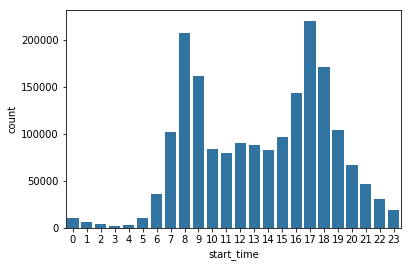

In [35]:
#plot the number of hours
base_color = sb.color_palette()[0]
sb.countplot(data = df_hour, x = 'start_time', color = base_color);

## Observations and next steps
We can see that most of the rides happen in the morning and evening times during the peak hours. **It would be interesting to only examine hours during working days or weekends.** Next, I examine distribution of rides across different days of the week.

**day of the week**

In [54]:
df_18['weekday'] = df_18['start_time'].dt.weekday_name

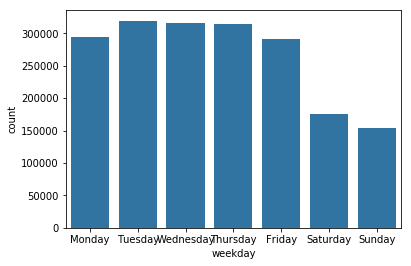

In [62]:
#plot the number of rides in different weekdays
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
base_color = sb.color_palette()[0]
sb.countplot(data = df_18, x = 'weekday', color = base_color, order = order);

## Observations and next steps
We can see that most of the rides happen during the working days. Fewer rides happen during the weekends. **It would be interesting to only examine hours during working days or weekends.** Next, I examine distribution of rides across different months of the year.

In [69]:
df_18['month'] = df_18['start_time'].dt.month

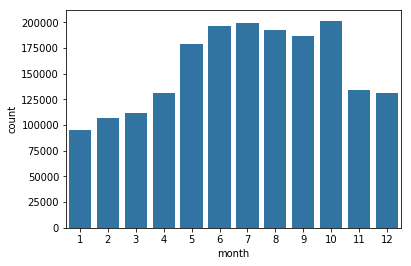

In [71]:
#plot the number of rides in different months
base_color = sb.color_palette()[0]
sb.countplot(data = df_18, x = 'month', color = base_color);

## Observations and next steps
We can see that most of the rides happen during the summer and autumn. Fewer rides happen during the winter months. Different to the winter months, October has normally warm temperatures and few rainy days. **Next, I only examine hours during working days or weekends.** 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!